# Metodo dos Elementos Finitos

<i>Primeiro Trabalho</i>

## Exercício Prático de Programação

Dada a Equação Diferencial Ordinária de Segunda Ordem abaixo:

\begin{equation}
    \frac{d^{2}u}{dx} - u = 0
\end{equation}

Sua solução analítica é:

\begin{equation}
    u\left(x\right) = \frac{e^{x}-e^{-x}}{e-e^{-1}}
\end{equation}

Assim, o trabalho consiste em criar um programa em Python para resolver este sistema numericamente no domínio $x \le 0 \le 1$, utilizando para tanto, o Método dos Elementos Finitos. Entre os parâmetros de entrada, deverá estar o números de elementos para discretizar o sistema (malha), para, então, comparar o erro pencentual das soluções em relação à solução analítica.

In [1]:
from numpy import array,zeros,math,linspace
from scipy.interpolate import interp1d
from scipy.linalg import solve
import matplotlib.pyplot as plt
plt.close('all') # apaga plotagens anterioresfrom numpy import array,arange,zeros,math,linspace

## Implementação da Solução Analítica (Exata)

In [2]:
def yexata(x):
    return (math.exp(1)**(x)-math.exp(1)**(-x))/(math.exp(1)-math.exp(-1))

## Implementação do MEF

Na implementação do Método dos Elementos Finitos, os seguintes dados de entrada são necessários:

* Limites do Domínio

* Condições de Contorno (Dirichlet)

* Número de Elementos na Malha

Assim, a função retorna dois vetores:

* O Domínio discretizado

* A solução nos nós da Malha

A solução dos pontos intermediários é dada por interpolação simples entre os nós adjascentes.

In [3]:
def mefn(a, b, ua, ub, n):
    x = array(linspace(a,b,n+1)) # Domínio
    # f = array([linspace(0,0,n+1)]).transpose() # Vetor de força nodal (matriz coluna de zeros)
    K = zeros([(n+1),(n+1)]) # Matriz de Rigidez Global
    he = (b-a)/n # Subdomínio
    for i in range(n): # Montagem da Matriz de Rigidez Global
        K[i,i] += (1/he)+(he/3)
        K[i,i+1] += (-1/he)+(he/6)
        K[i+1,i] += (-1/he)+(he/6)
        K[i+1,i+1] += (1/he)+(he/3)
    # Rearranjo do Sistema
    # f -= ua*K[:,0] + ub*K[:,n] # Implementação alternativa com inicialização de f
    f = - ua*K[:,0] - ub*K[:,n]
    K[:,0] *= 0
    K[:,n] *= 0
    K[0,0] = 1.
    K[n,n] = -1.
    # Solução do Sistema
    u = solve(K,f) # Vetor de solução
    u[0],u[n] = ua,ub # Substituição de du(a)/dx e du(b)/dx por u(a) e u(b)
    return x, u

### Gráfico Comparativo das Soluções

Para comparar as soluções, será utilizada uma função para entrar com o número de elementos e gerar o gráfico comparativo

In [4]:
def interpol(xd,yd,x): # Função para interpolar u linearmente entre os nós
    return interp1d(xd,yd,kind='linear')(x)
def plotmef(n, nplot): # Função que plota nplot pontos discretizados em n elementos
    a,b = 0,1 # Limites de Integração
    ua,ub = yexata(a),yexata(b) # Condições de Contorno
    xd,yd = mefn(a,b,ua,ub,n)
    x = linspace(0.,1.,11)
    u = interpol(xd,yd,x)
    y = yexata(x)
    ref = int(len(x)/2)
    erro = 100*(y[ref]-u[ref])/y[ref]
    return x,u,erro

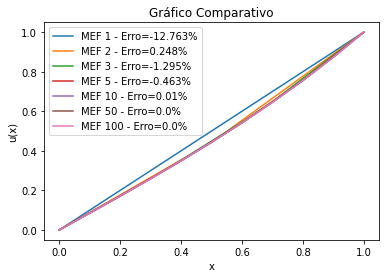

In [5]:
nel = [1,2,3,5,10,50,100]
amostra = 50
plt.figure(1)
plt.title('Gráfico Comparativo')
plt.xlabel('x')
plt.ylabel('u(x)')
for e in nel:
    x,u,erro = plotmef(e,amostra)
    plt.plot(x,u,label='MEF '+str(e)+' - Erro='+str(round(erro,3))+'%')
plt.legend()